In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DATA_PATH = "../xgb_dataset/train_features.csv"
DATA_PATH = "../xgb_dataset/val_features.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()

Shape: (900, 10)


,mob_0,mob_1,mob_2,eff_0,eff_1,eff_2,res_0,res_1,res_2,label
0,0.997054,1.166007e-06,0.002944,0.965661,0.019197,0.015142,0.965859,0.010962,0.023179,0
1,0.999991,1.281968e-06,0.000007,0.970356,0.016000,0.013644,0.968719,0.020908,0.010374,0
2,0.999996,6.850930e-08,0.000004,0.967172,0.018795,0.014033,0.966922,0.022650,0.010429,0
3,0.996528,5.506297e-04,0.002921,0.966846,0.016988,0.016165,0.951983,0.015790,0.032227,0
4,0.999958,4.085434e-05,0.000001,0.971207,0.015087,0.013706,0.964161,0.018583,0.017256,0


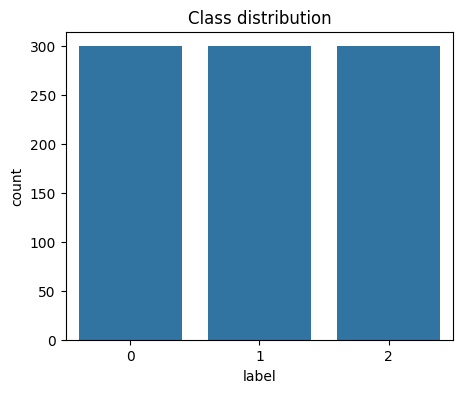

In [3]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["label"])
plt.title("Class distribution")
plt.show()

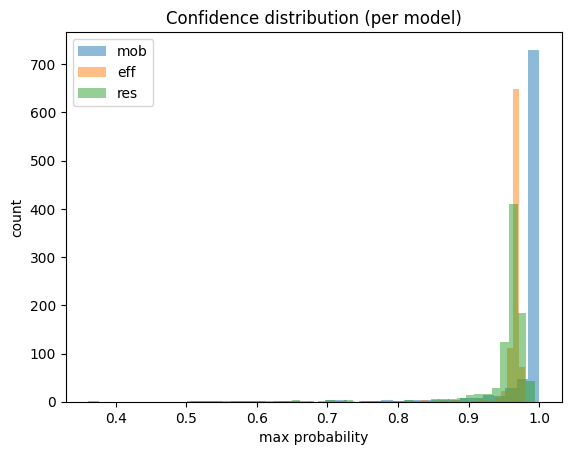

In [4]:
for model in ["mob","eff","res"]:
    cols = [f"{model}_0",f"{model}_1",f"{model}_2"]
    conf = df[cols].max(axis=1)

    plt.hist(conf, bins=40, alpha=0.5, label=model)

plt.legend()
plt.title("Confidence distribution (per model)")
plt.xlabel("max probability")
plt.ylabel("count")
plt.show()

In [5]:
mob = df[["mob_0","mob_1","mob_2"]].values.argmax(1)
eff = df[["eff_0","eff_1","eff_2"]].values.argmax(1)
res = df[["res_0","res_1","res_2"]].values.argmax(1)

disagree = (mob != eff) | (mob != res)

print("Disagreement samples:", disagree.sum())

df[disagree].to_csv("xgb_disagreement_samples.csv", index=False)

Disagreement samples: 19


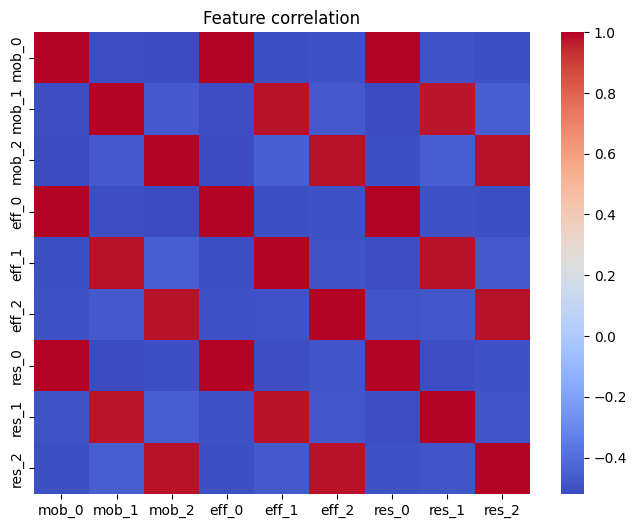

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop("label", axis=1).corr(), cmap="coolwarm")
plt.title("Feature correlation")
plt.show()

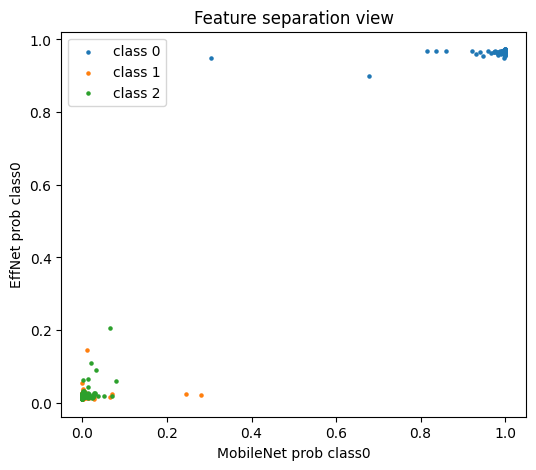

In [7]:
plt.figure(figsize=(6,5))

for lbl in sorted(df.label.unique()):
    subset = df[df.label==lbl]
    plt.scatter(subset["mob_0"], subset["eff_0"], s=5, label=f"class {lbl}")

plt.legend()
plt.xlabel("MobileNet prob class0")
plt.ylabel("EffNet prob class0")
plt.title("Feature separation view")
plt.show()

In [8]:
threshold = 0.6

conf_mob = df[["mob_0","mob_1","mob_2"]].max(axis=1)
conf_eff = df[["eff_0","eff_1","eff_2"]].max(axis=1)
conf_res = df[["res_0","res_1","res_2"]].max(axis=1)

low_conf_mask = (conf_mob < threshold) | (conf_eff < threshold) | (conf_res < threshold)

print("Low confidence samples:", low_conf_mask.sum())

df[low_conf_mask].to_csv("xgb_low_confidence.csv", index=False)


Low confidence samples: 17
